## ASSIGNMENT ONE: WEB SCRAPING WEATHER DATA
### Econia Racheal
### Access Number: B26253

In [29]:
import requests
import pandas as pd

# Your Open Weather API key
api_key = '3d810fdbd8f77c9ac45b30f4acdfe671'

# List of African cities with their coordinates
african_cities = [
    {'name': 'Nairobi', 'lat': -1.286389, 'lon': 36.817223},
    {'name': 'Lagos', 'lat': 6.5244, 'lon': 3.3792},
    {'name': 'Cairo', 'lat': 30.0444, 'lon': 31.2357},
    {'name': 'Cape Town', 'lat': -33.9249, 'lon': 18.4241},
    {'name': 'Accra', 'lat': 5.6037, 'lon': -0.1870},
    # Add more cities as needed
]

# Function to get weather data from Open Weather API using coordinates
def get_weather_data(lat, lon):
    api_url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric'
    response = requests.get(api_url)
    data = response.json()

    if response.status_code == 200:
        # Extract relevant weather data from the API response
        return {
            'City': data['name'],
            'Date': pd.to_datetime('today').date(),  # Use today's date
            'Temperature (°C)': data['main']['temp'],  # Temperature in Celsius
            'Humidity (%)': data['main']['humidity'],  # Humidity percentage
            'Wind Speed (m/s)': data['wind']['speed'],  # Wind speed in m/s
            'Condition': data['weather'][0]['description'],  # Weather condition (e.g., clear sky, rain)
        }
    else:
        # If there is an error with the API request, print the error
        print(f"Error fetching data for coordinates ({lat}, {lon}): {data.get('message', 'Unknown error')}")
        return None

# Main execution
all_weather_data = []

# Get data for each city
for city in african_cities:
    print(f"Fetching data for {city['name']}...")
    api_data = get_weather_data(city['lat'], city['lon'])
    if api_data:
        all_weather_data.append(api_data)

# Store data in a structured format (Pandas DataFrame)
df = pd.DataFrame(all_weather_data)

# Save the DataFrame to a CSV file
df.to_csv('econia.csv', index=False)  # Save as econia.csv

print("Weather data for African cities saved to 'econia.csv'.")


Fetching data for Nairobi...
Fetching data for Lagos...
Fetching data for Cairo...
Fetching data for Cape Town...
Fetching data for Accra...
Weather data for African cities saved to 'econia.csv'.


         City        Date  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  \
0     Nairobi  2025-02-18             25.02            36              5.14   
1    Shogunle  2025-02-18             30.20            63              4.34   
2  Al ‘Atabah  2025-02-18             20.33            34              2.06   
3   Cape Town  2025-02-18             21.06            72              6.71   
4       Accra  2025-02-18             29.69            60              6.12   

          Condition  
0        few clouds  
1        few clouds  
2         clear sky  
3         clear sky  
4  scattered clouds  

Most Common Weather Conditions:
Condition
few clouds          2
clear sky           2
scattered clouds    1
Name: count, dtype: int64


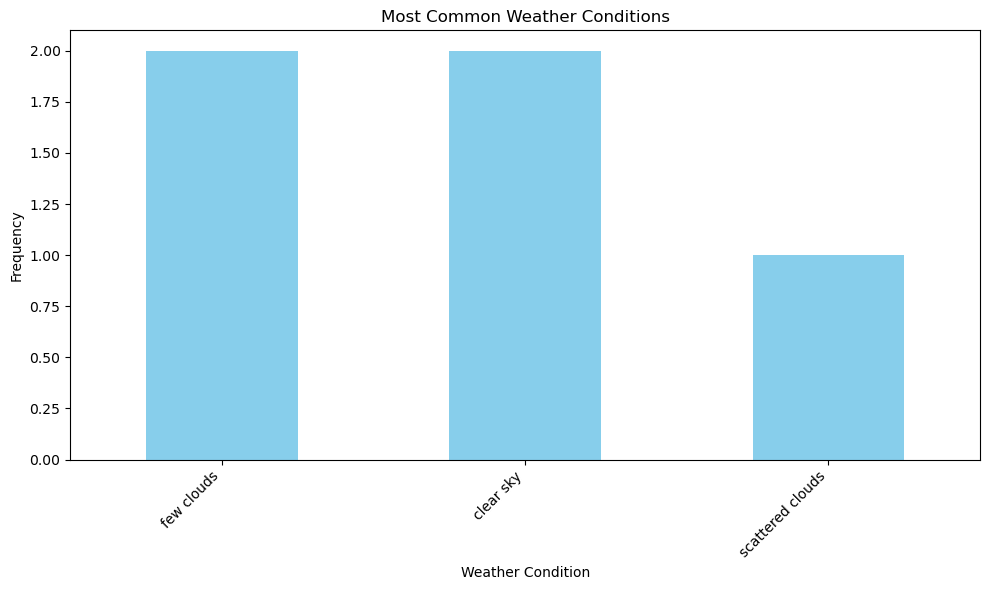

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the weather data from the CSV file
df = pd.read_csv('econia.csv')

# Display the first few rows to ensure data is loaded correctly
print(df.head())

# Analyze the most common weather conditions
weather_condition_counts = df['Condition'].value_counts()

# Display the most common weather conditions
print("\nMost Common Weather Conditions:")
print(weather_condition_counts)

# Optional: Visualize the most common weather conditions
weather_condition_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Most Common Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the weather data from the CSV file
df = pd.read_csv('econia.csv')

# Display the first few rows to ensure the data is loaded correctly
print(df.head())

# Calculate the average temperature
average_temperature = df['Temperature (°C)'].mean()

# Display the average temperature
print(f"\nThe average temperature recorded is: {average_temperature:.2f} °C")



         City        Date  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  \
0     Nairobi  2025-02-18             25.02            36              5.14   
1    Shogunle  2025-02-18             30.20            63              4.34   
2  Al ‘Atabah  2025-02-18             20.33            34              2.06   
3   Cape Town  2025-02-18             21.06            72              6.71   
4       Accra  2025-02-18             29.69            60              6.12   

          Condition  
0        few clouds  
1        few clouds  
2         clear sky  
3         clear sky  
4  scattered clouds  

The average temperature recorded is: 25.26 °C


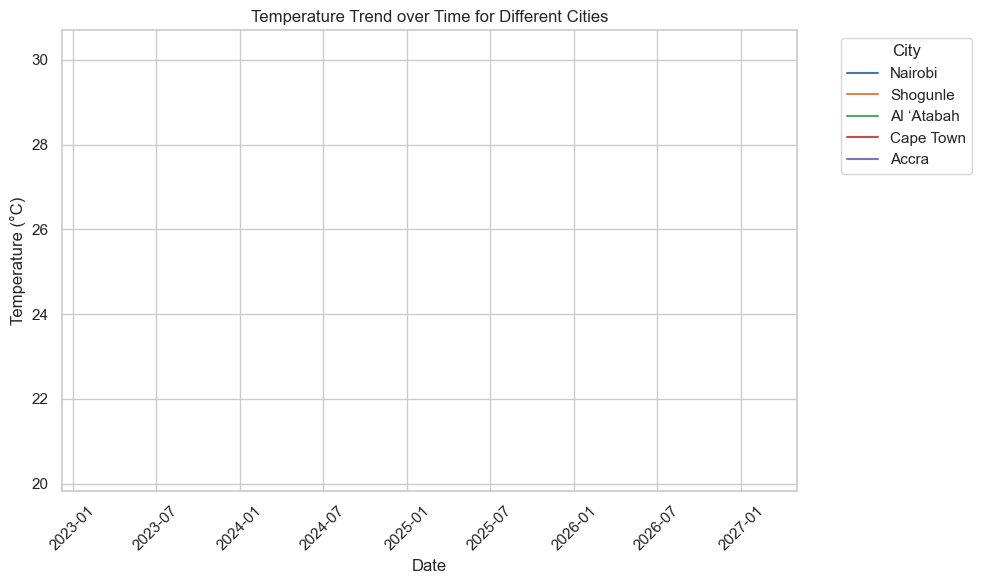

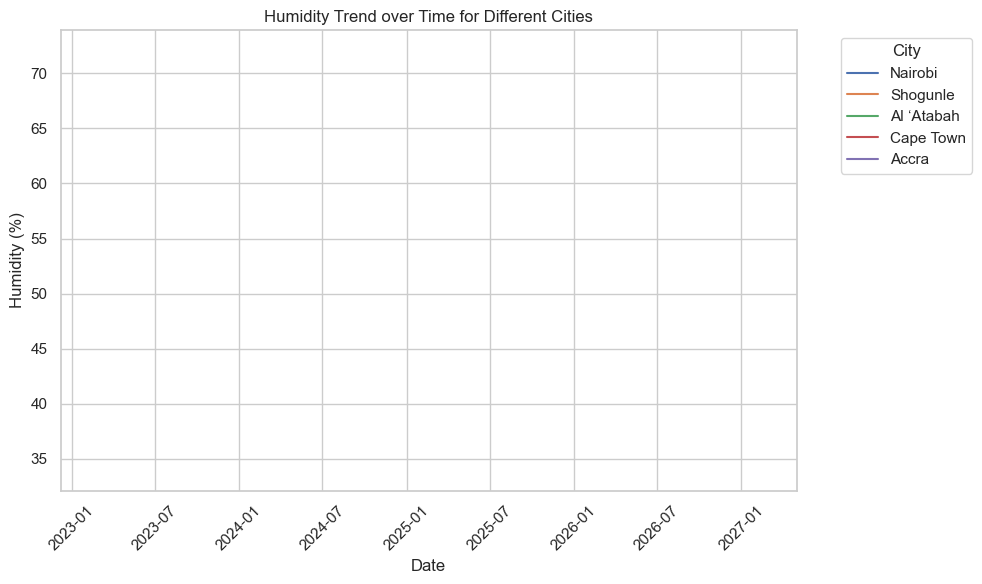

C:\Users\DELL\AppData\Local\Temp\ipykernel_17544\3955399016.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Blues_d')


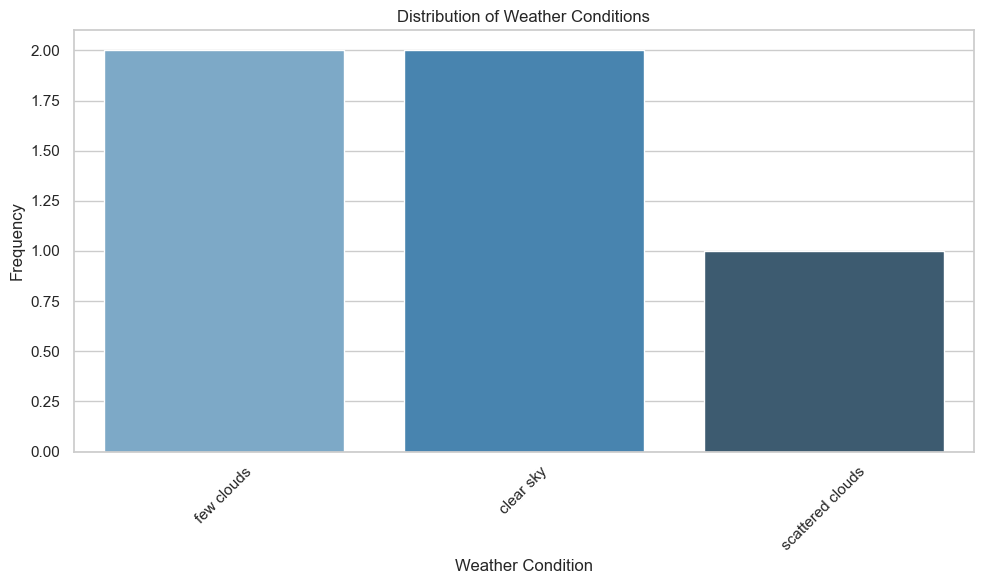

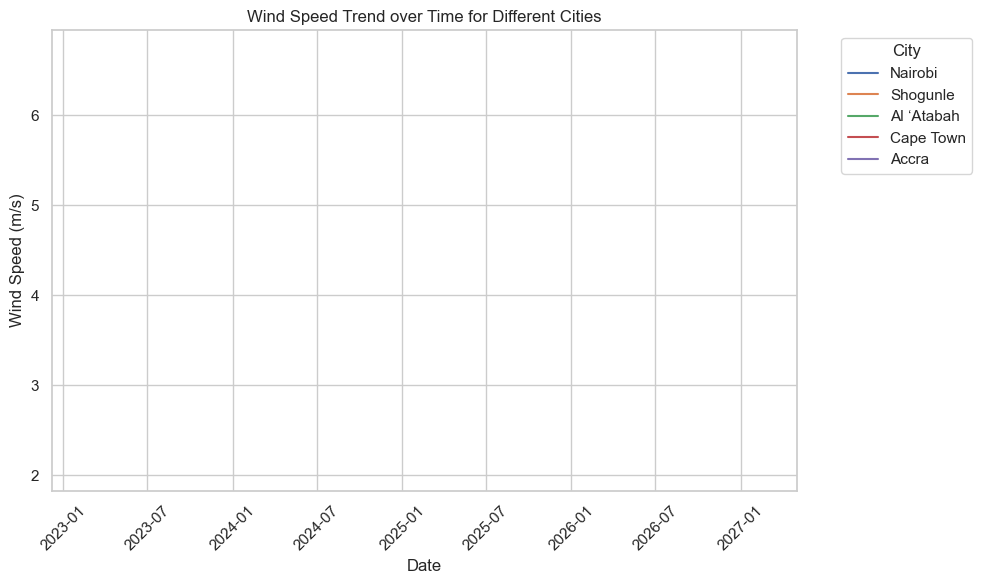

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather data from the CSV file
df = pd.read_csv('econia.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plotting style for seaborn
sns.set(style="whitegrid")

# 1. Temperature Trend over time (Line plot for each city's temperature)
plt.figure(figsize=(10, 6))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Temperature (°C)'], label=city)
plt.title('Temperature Trend over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Humidity Trend over time (Line plot for each city's humidity)
plt.figure(figsize=(10, 6))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Humidity (%)'], label=city)
plt.title('Humidity Trend over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Weather Condition Distribution (Bar plot of conditions)
plt.figure(figsize=(10, 6))
condition_counts = df['Condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Blues_d')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Wind Speed Trend over time (Line plot for each city's wind speed)
plt.figure(figsize=(10, 6))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Wind Speed (m/s)'], label=city)
plt.title('Wind Speed Trend over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


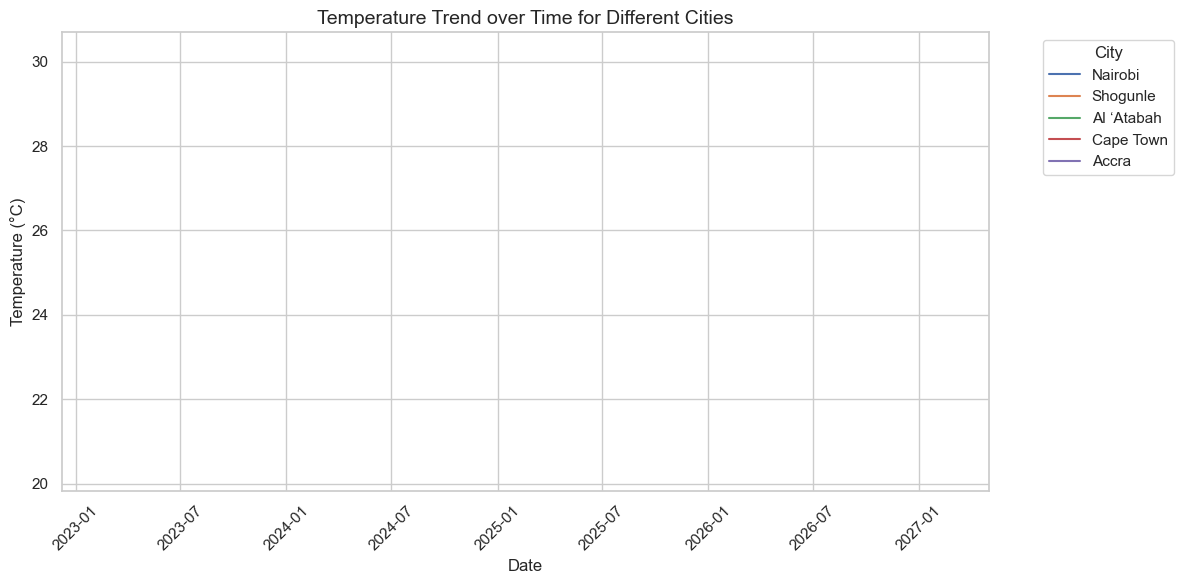

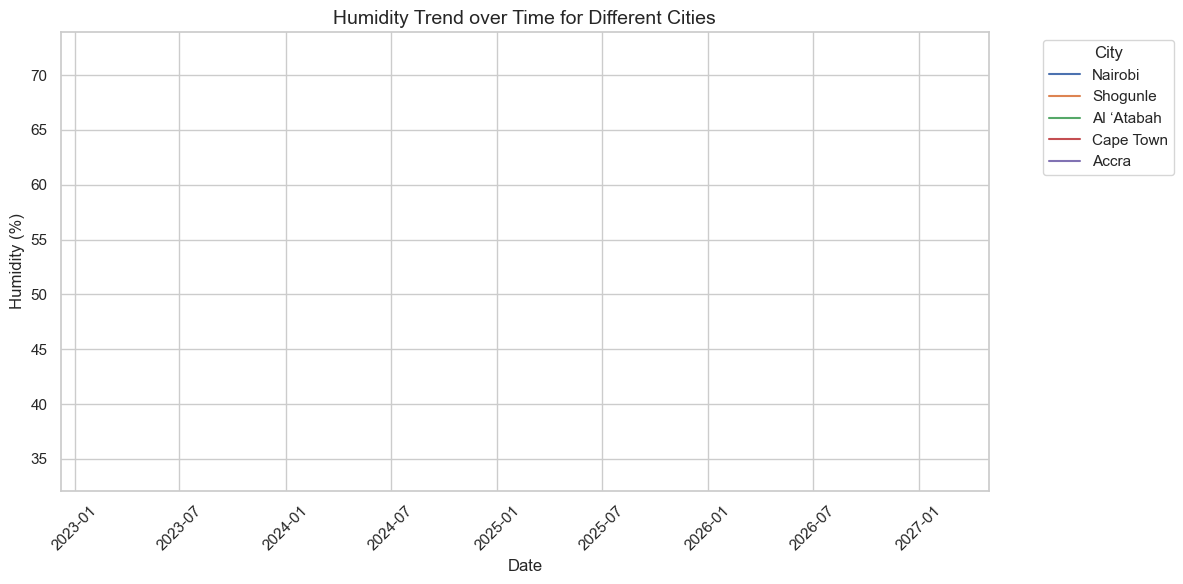

C:\Users\DELL\AppData\Local\Temp\ipykernel_17544\1655161502.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Blues_d')


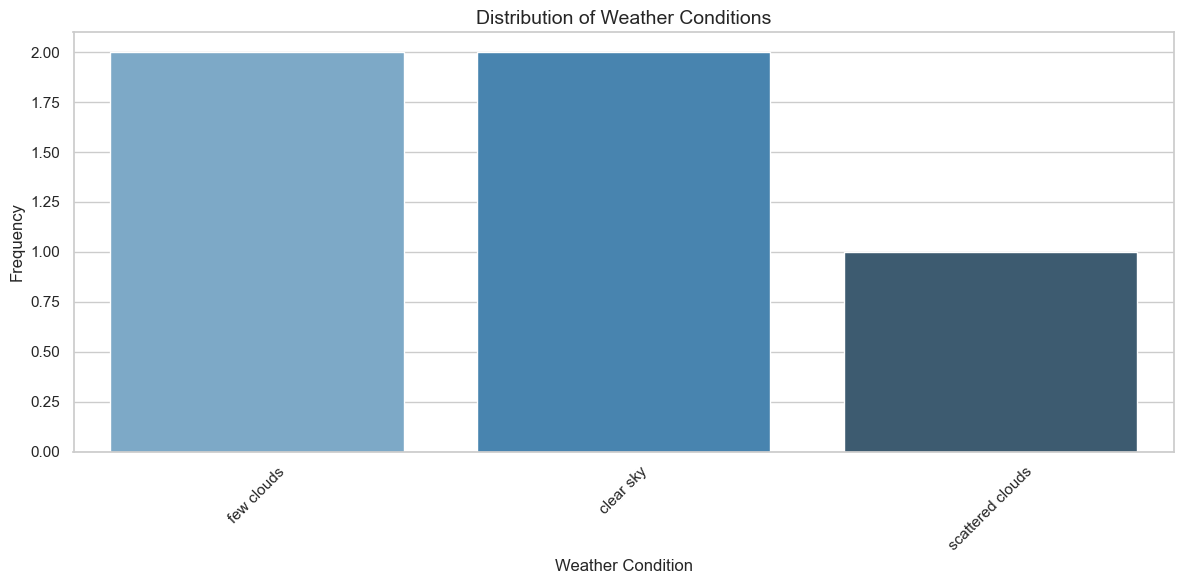

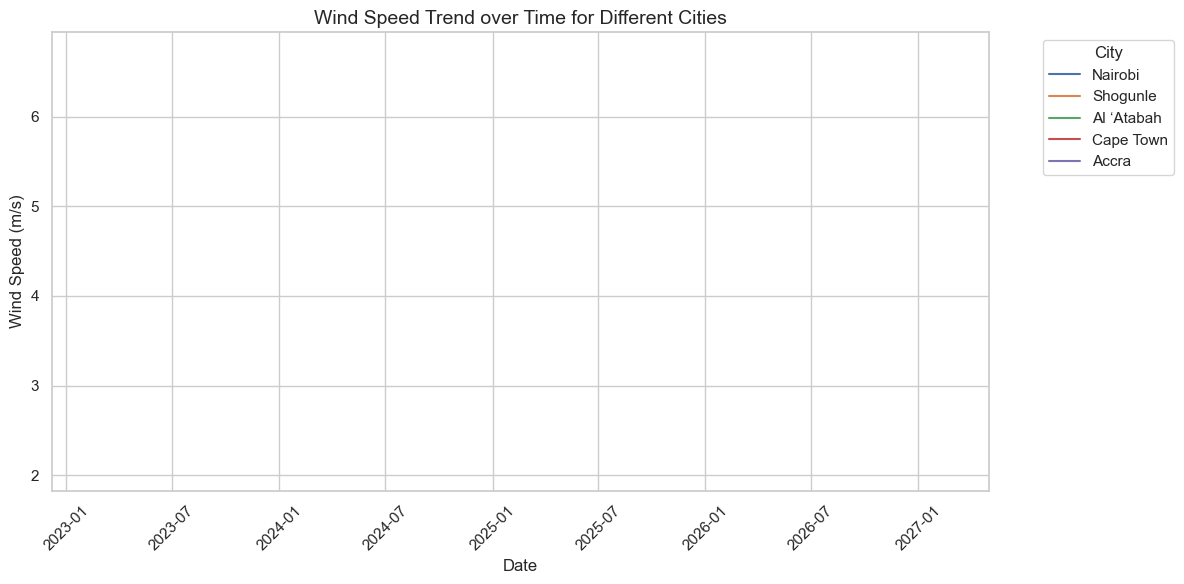

In [11]:
#repeated trend visuals

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather data from the CSV file
df = pd.read_csv('econia.csv')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plotting style for seaborn
sns.set(style="whitegrid")

# 1. Temperature Trend over time (Line plot for each city's temperature)
plt.figure(figsize=(12, 6))  # Set the size of the plot
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Temperature (°C)'], label=city)
    
plt.title('Temperature Trend over Time for Different Cities', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Humidity Trend over time (Line plot for each city's humidity)
plt.figure(figsize=(12, 6))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Humidity (%)'], label=city)
    
plt.title('Humidity Trend over Time for Different Cities', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Weather Condition Distribution (Bar plot of conditions)
plt.figure(figsize=(12, 6))
condition_counts = df['Condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Blues_d')
plt.title('Distribution of Weather Conditions', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Wind Speed Trend over time (Line plot for each city's wind speed)
plt.figure(figsize=(12, 6))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Wind Speed (m/s)'], label=city)
    
plt.title('Wind Speed Trend over Time for Different Cities', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                  Temperature (°C)  Humidity (%)  Wind Speed (m/s)
Temperature (°C)          1.000000      0.311359          0.266493
Humidity (%)              0.311359      1.000000          0.704830
Wind Speed (m/s)          0.266493      0.704830          1.000000


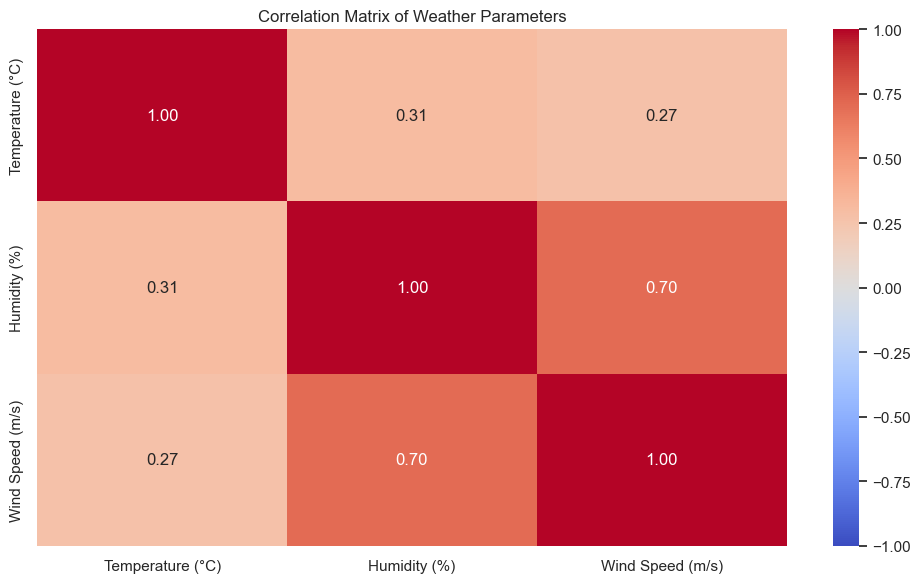


Parameters with highest correlation with Temperature:
Temperature (°C)    1.000000
Humidity (%)        0.311359
Wind Speed (m/s)    0.266493
Name: Temperature (°C), dtype: float64


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the weather data from the CSV file
df = pd.read_csv('econia.csv')

# Ensure 'Temperature (°C)', 'Humidity (%)', and 'Wind Speed (m/s)' are treated as numeric
df['Temperature (°C)'] = pd.to_numeric(df['Temperature (°C)'], errors='coerce')
df['Humidity (%)'] = pd.to_numeric(df['Humidity (%)'], errors='coerce')
df['Wind Speed (m/s)'] = pd.to_numeric(df['Wind Speed (m/s)'], errors='coerce')

# Drop rows with NaN values (in case there were issues with the conversion to numeric)
df = df.dropna(subset=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)'])

# Calculate the correlation matrix
correlation_matrix = df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Weather Parameters')
plt.tight_layout()
plt.show()

# Identify the parameters with the highest correlation with Temperature
temperature_correlation = correlation_matrix['Temperature (°C)']
sorted_correlation = temperature_correlation.sort_values(ascending=False)

# Display the parameters with highest correlation with Temperature
print("\nParameters with highest correlation with Temperature:")
print(sorted_correlation)


Number of data points: 5


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

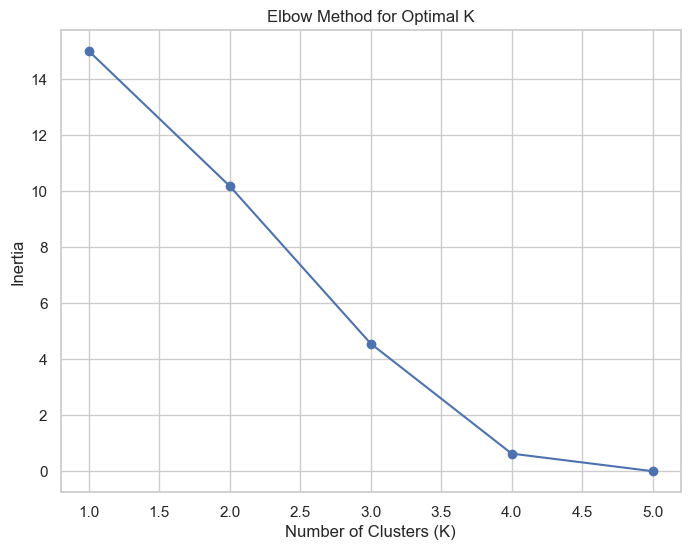

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


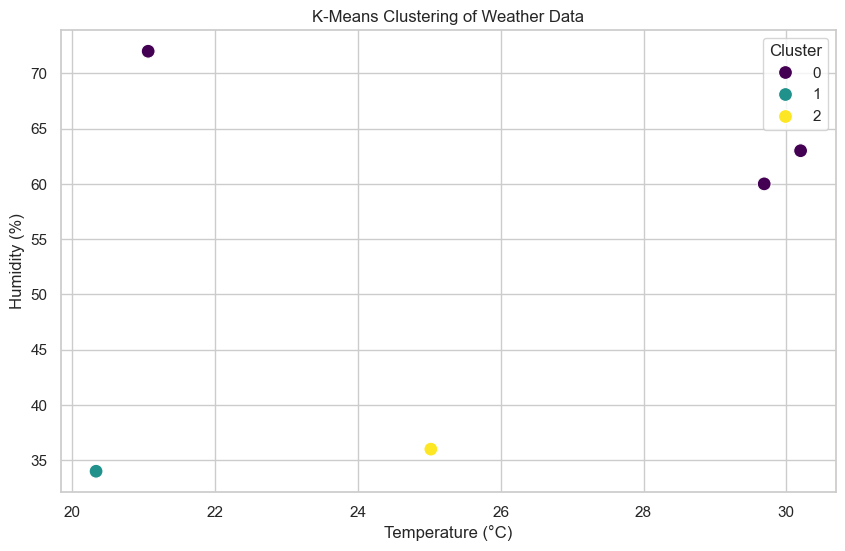


Cluster Centroids (Temperature, Humidity, Wind Speed):
[[26.98333333 65.          5.72333333]
 [20.33       34.          2.06      ]
 [25.02       36.          5.14      ]]


In [27]:
#K clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocess the data: Convert columns to numeric and drop rows with missing values
df['Temperature (°C)'] = pd.to_numeric(df['Temperature (°C)'], errors='coerce')
df['Humidity (%)'] = pd.to_numeric(df['Humidity (%)'], errors='coerce')
df['Wind Speed (m/s)'] = pd.to_numeric(df['Wind Speed (m/s)'], errors='coerce')
df = df.dropna(subset=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)'])

# Check the number of data points
num_samples = df.shape[0]
print(f"Number of data points: {num_samples}")

# Ensure k does not exceed the number of samples
max_k = min(5, num_samples)  # Set k to the smaller of 5 or the number of data points

# Select the relevant numerical features for clustering
features = ['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, max_k + 1):  # Test from 1 to max_k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (e.g., k = 3)
optimal_k = 3  # You can change this based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Humidity (%)', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of Weather Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Cluster')
plt.show()

# Print the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centroids (Temperature, Humidity, Wind Speed):")
print(centroids)


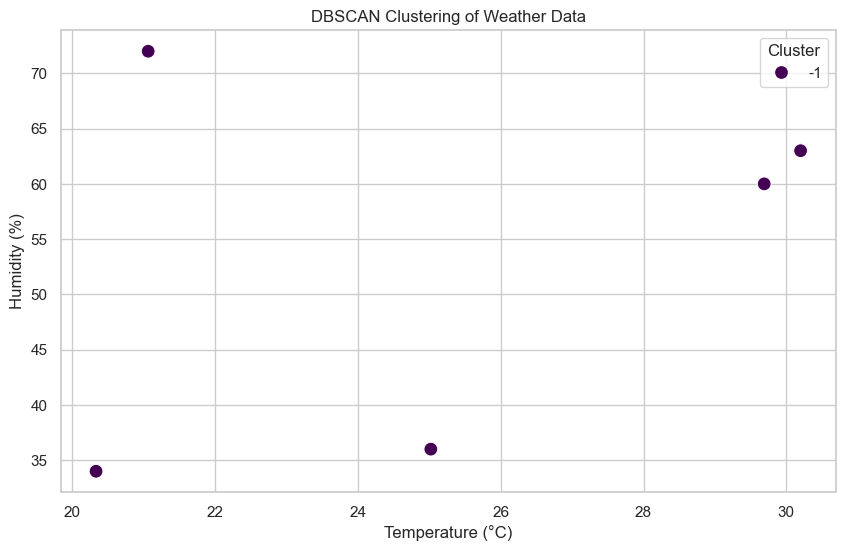

In [19]:
#DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Humidity (%)', hue='DBSCAN Cluster', palette='viridis', data=df, s=100)
plt.title('DBSCAN Clustering of Weather Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Cluster')
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


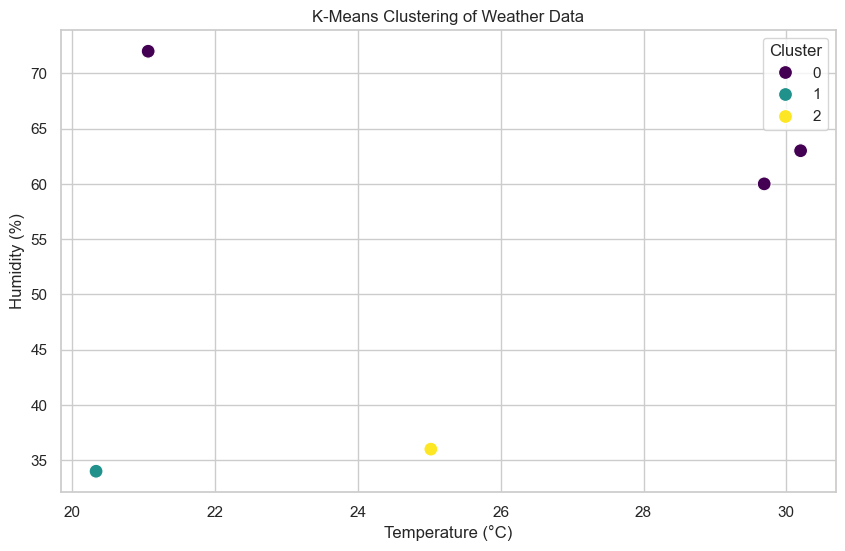


Cluster Centroids (Temperature, Humidity, Wind Speed):
[[26.98333333 65.          5.72333333]
 [20.33       34.          2.06      ]
 [25.02       36.          5.14      ]]


In [25]:
#joblib
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocess the data: Convert columns to numeric and drop rows with missing values
df['Temperature (°C)'] = pd.to_numeric(df['Temperature (°C)'], errors='coerce')
df['Humidity (%)'] = pd.to_numeric(df['Humidity (%)'], errors='coerce')
df['Wind Speed (m/s)'] = pd.to_numeric(df['Wind Speed (m/s)'], errors='coerce')
df = df.dropna(subset=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)'])

# Select the relevant numerical features for clustering
features = ['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
optimal_k = 3  # You can change this based on the Elbow plot or prior knowledge

# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save the K-Means model using joblib
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler_model.joblib')

# Save the DataFrame to CSV as before
df.to_csv('econia.csv', index=False)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Humidity (%)', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of Weather Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Cluster')
plt.show()

# Print the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centroids (Temperature, Humidity, Wind Speed):")
print(centroids)
